# EDA for BTCV dataset

## Setup Environment

In [1]:
# mount driver
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CardiacSeg/eda/BTCV

# install dependents
!pip install -q "monai-weekly[nibabel, tqdm, einops]"
!python -c "import matplotlib" || pip install -q matplotlib
%matplotlib inline

# sync python module
%load_ext autoreload
%autoreload 2

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1jz_DGnICBmKWCr_JL904PDQdIEK0_EQG/CardiacSeg/eda/BTCV
     |████████████████████████████████| 1.2 MB 4.1 MB/s 
     |████████████████████████████████| 41 kB 63 kB/s 


## Import Library

In [2]:
import sys
# set package path
sys.path.append("/content/drive/MyDrive/CardiacSeg")

import os

from monai.data import CacheDataset, DatasetSummary
from monai.transforms import (
    Compose,
    LoadImaged,
    AddChanneld,
    Orientationd,
    Spacingd,
    ScaleIntensityRanged,
    NormalizeIntensityd
)
from monai.utils import first

import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

from data_utils.btcv_dataset import get_data_dicts
from data_utils.visualization import show_img_lbl
from data_utils.utils import get_data_info

## Prepare data dicts

In [3]:
data_dir = '/content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training'

In [4]:
data_dicts = get_data_dicts(data_dir)

## Show data info

pid: img0001
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0001.nii.gz
img shape: [512, 512, 147]
img spacing: [0.66796875, 0.66796875, 3.0]
lbl shape: [512, 512, 147]
lbl spacing: [0.66796875, 0.66796875, 3.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


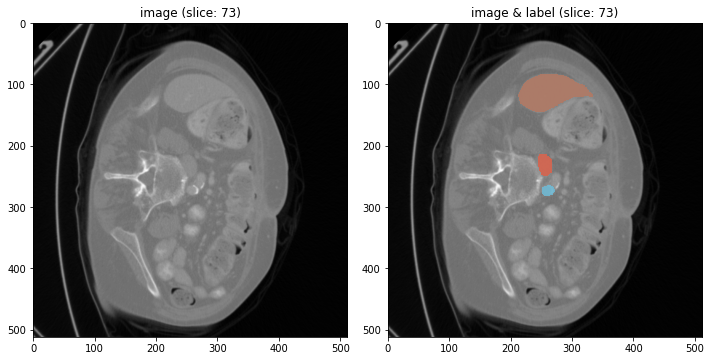


pid: img0002
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0002.nii.gz
img shape: [512, 512, 139]
img spacing: [0.7207031, 0.7207031, 3.0]
lbl shape: [512, 512, 139]
lbl spacing: [0.7207031, 0.7207031, 3.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


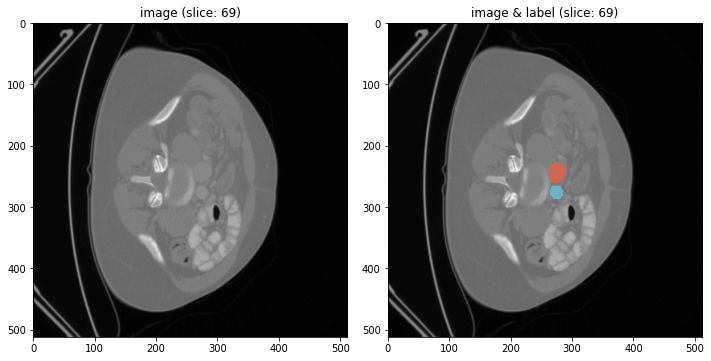


pid: img0003
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0003.nii.gz
img shape: [512, 512, 198]
img spacing: [0.8984375, 0.8984375, 3.0]
lbl shape: [512, 512, 198]
lbl spacing: [0.8984375, 0.8984375, 3.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


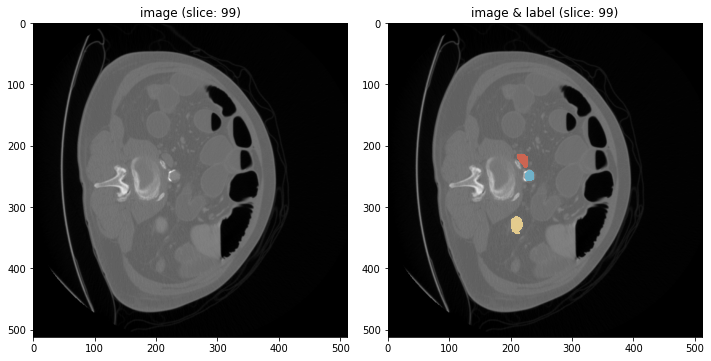


pid: img0004
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0004.nii.gz
img shape: [512, 512, 140]
img spacing: [0.59375, 0.59375, 3.0]
lbl shape: [512, 512, 140]
lbl spacing: [0.59375, 0.59375, 3.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


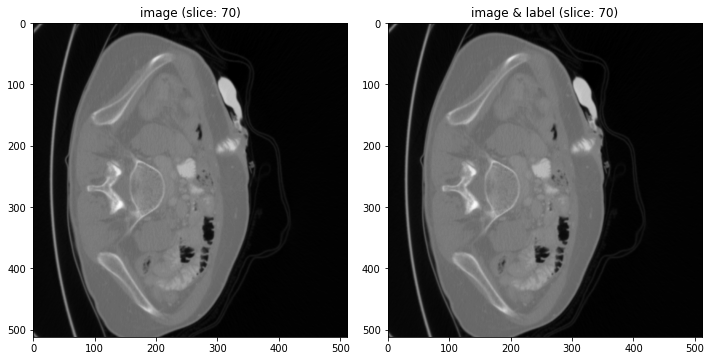


pid: img0005
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0005.nii.gz
img shape: [512, 512, 117]
img spacing: [0.90625, 0.90625, 3.0]
lbl shape: [512, 512, 117]
lbl spacing: [0.90625, 0.90625, 3.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


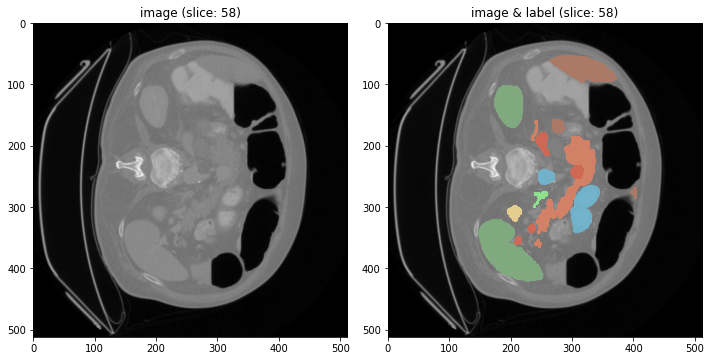


pid: img0006
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0006.nii.gz
img shape: [512, 512, 131]
img spacing: [0.7011719, 0.7011719, 3.0]
lbl shape: [512, 512, 131]
lbl spacing: [0.7011719, 0.7011719, 3.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


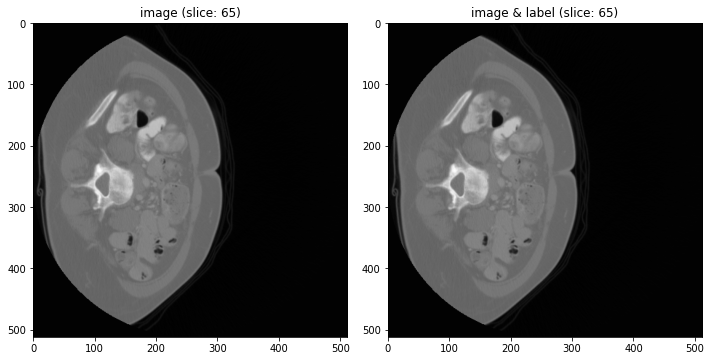


pid: img0007
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0007.nii.gz
img shape: [512, 512, 163]
img spacing: [0.7480469, 0.7480469, 3.0]
lbl shape: [512, 512, 163]
lbl spacing: [0.7480469, 0.7480469, 3.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


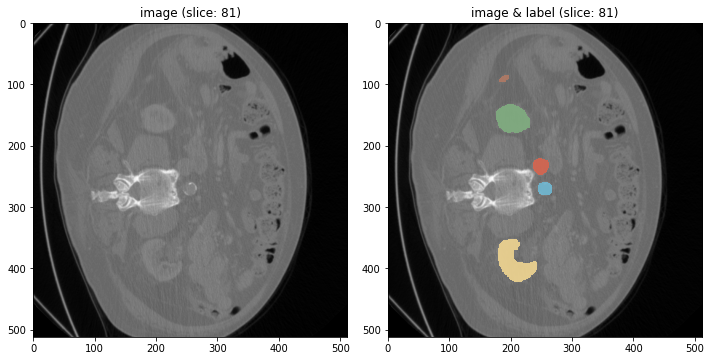


pid: img0008
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0008.nii.gz
img shape: [512, 512, 148]
img spacing: [0.7285156, 0.7285156, 3.0]
lbl shape: [512, 512, 148]
lbl spacing: [0.7285156, 0.7285156, 3.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


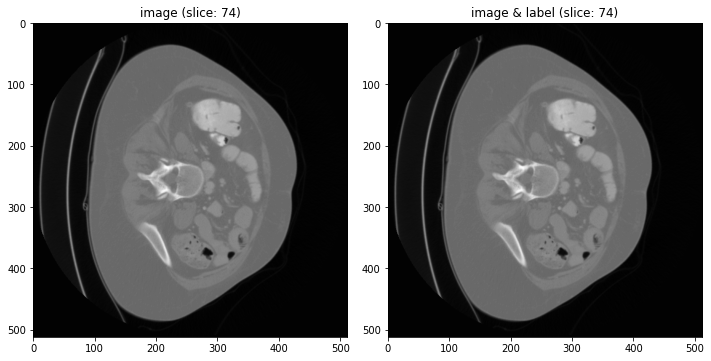


pid: img0009
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0009.nii.gz
img shape: [512, 512, 149]
img spacing: [0.976562, 0.976562, 2.5]
lbl shape: [512, 512, 149]
lbl spacing: [0.976562, 0.976562, 2.5]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


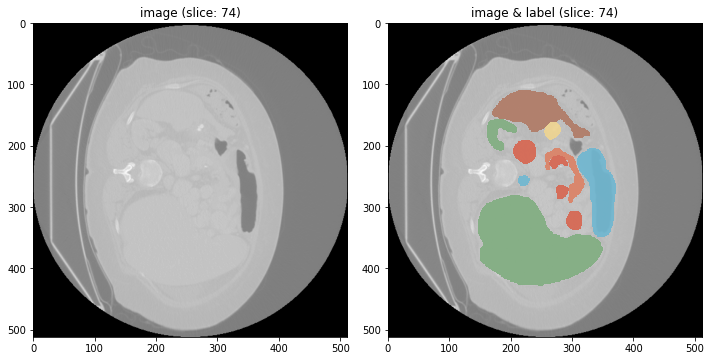


pid: img0010
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0010.nii.gz
img shape: [512, 512, 148]
img spacing: [0.78125, 0.78125, 3.0]
lbl shape: [512, 512, 148]
lbl spacing: [0.78125, 0.78125, 3.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


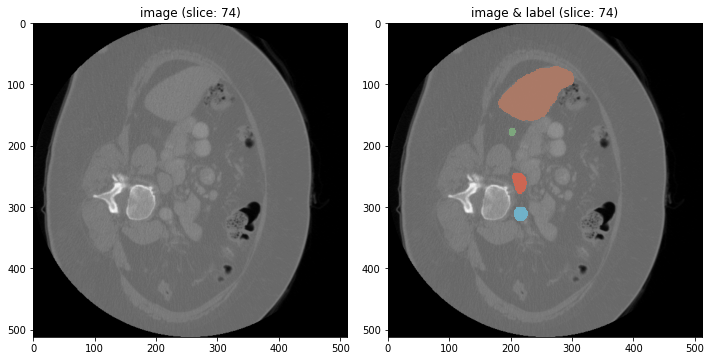


pid: img0021
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0021.nii.gz
img shape: [512, 512, 143]
img spacing: [0.68359375, 0.68359375, 3.0]
lbl shape: [512, 512, 143]
lbl spacing: [0.68359375, 0.68359375, 3.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


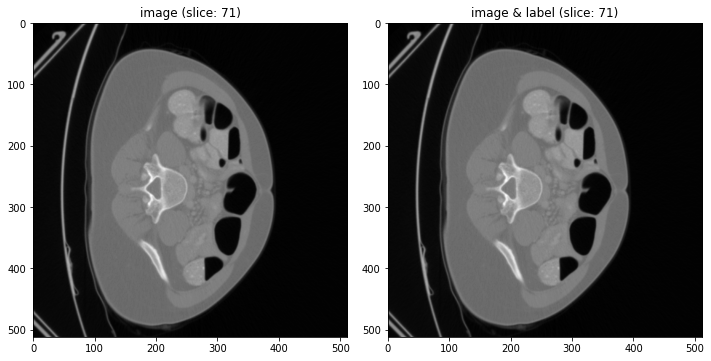


pid: img0022
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0022.nii.gz
img shape: [512, 512, 89]
img spacing: [0.767578, 0.767578, 5.0]
lbl shape: [512, 512, 89]
lbl spacing: [0.767578, 0.767578, 5.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


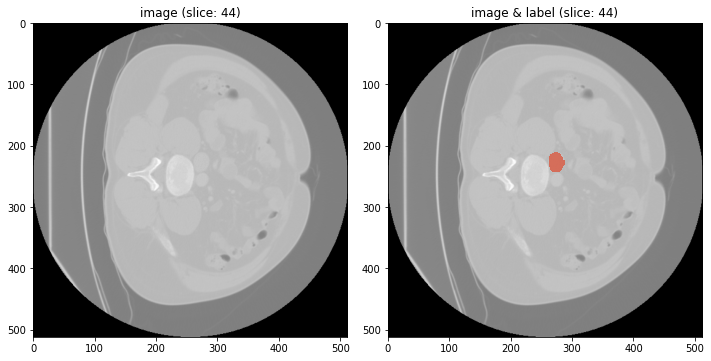


pid: img0023
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0023.nii.gz
img shape: [512, 512, 96]
img spacing: [0.70703125, 0.70703125, 5.0]
lbl shape: [512, 512, 96]
lbl spacing: [0.70703125, 0.70703125, 5.0]
lbl ids: [ 0.  1.  2.  3.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


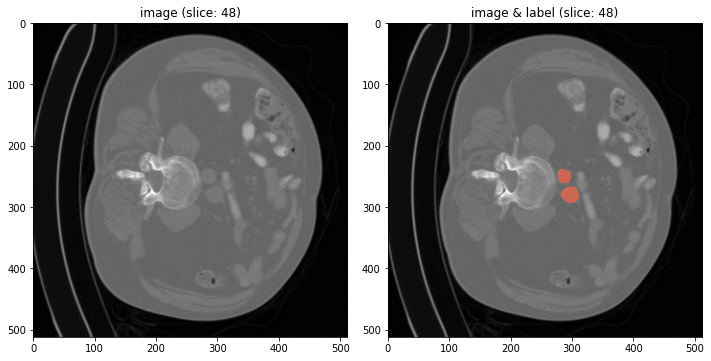


pid: img0024
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0024.nii.gz
img shape: [512, 512, 124]
img spacing: [0.6855469, 0.6855469, 3.0]
lbl shape: [512, 512, 124]
lbl spacing: [0.6855469, 0.6855469, 3.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


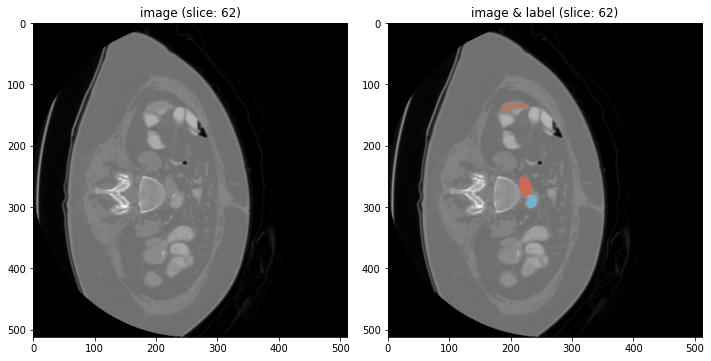


pid: img0025
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0025.nii.gz
img shape: [512, 512, 85]
img spacing: [0.83203125, 0.83203125, 5.0]
lbl shape: [512, 512, 85]
lbl spacing: [0.83203125, 0.83203125, 5.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


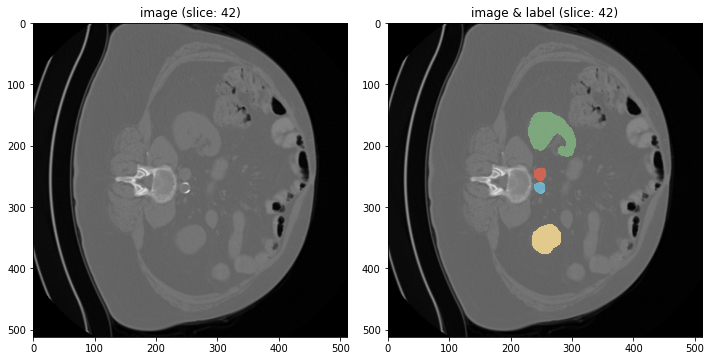


pid: img0026
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0026.nii.gz
img shape: [512, 512, 131]
img spacing: [0.779297, 0.779297, 5.0]
lbl shape: [512, 512, 131]
lbl spacing: [0.779297, 0.779297, 5.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


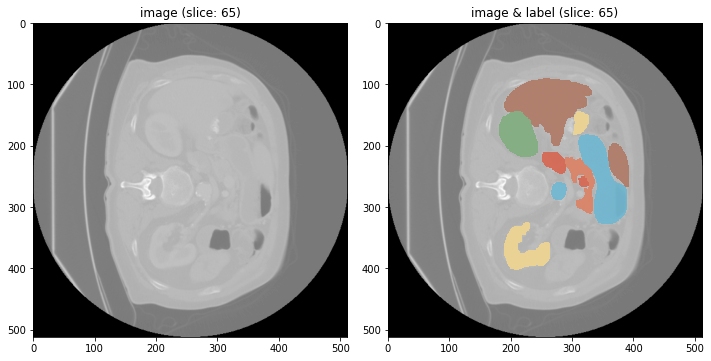


pid: img0027
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0027.nii.gz
img shape: [512, 512, 88]
img spacing: [0.775391, 0.775391, 5.0]
lbl shape: [512, 512, 88]
lbl spacing: [0.775391, 0.775391, 5.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


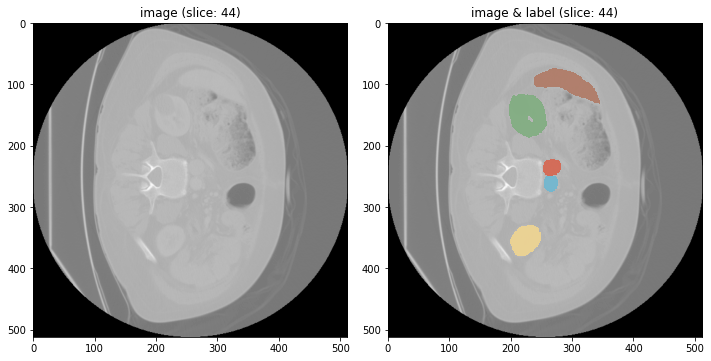


pid: img0028
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0028.nii.gz
img shape: [512, 512, 89]
img spacing: [0.796875, 0.796875, 5.0]
lbl shape: [512, 512, 89]
lbl spacing: [0.796875, 0.796875, 5.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


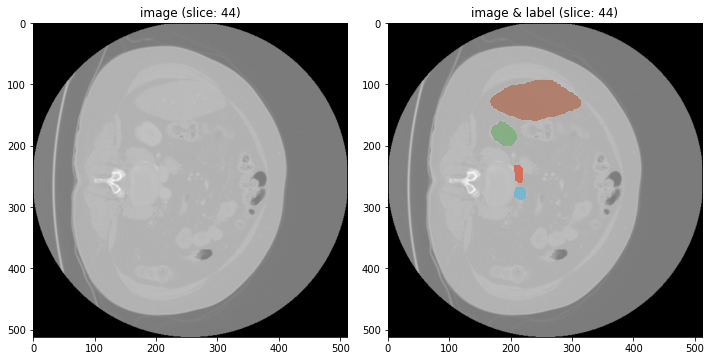


pid: img0029
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0029.nii.gz
img shape: [512, 512, 100]
img spacing: [0.875, 0.875, 3.0]
lbl shape: [512, 512, 100]
lbl spacing: [0.875, 0.875, 3.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


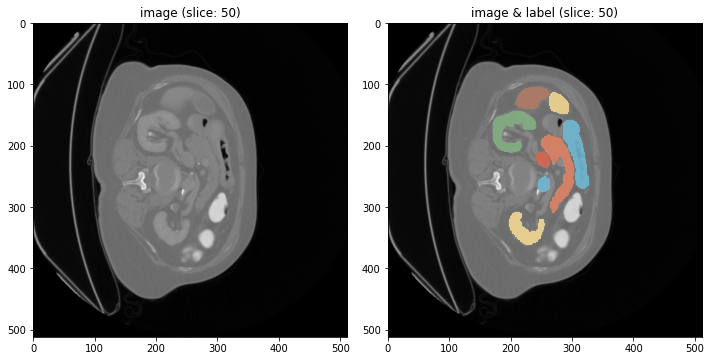


pid: img0030
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0030.nii.gz
img shape: [512, 512, 153]
img spacing: [0.7421875, 0.7421875, 3.0]
lbl shape: [512, 512, 153]
lbl spacing: [0.7421875, 0.7421875, 3.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


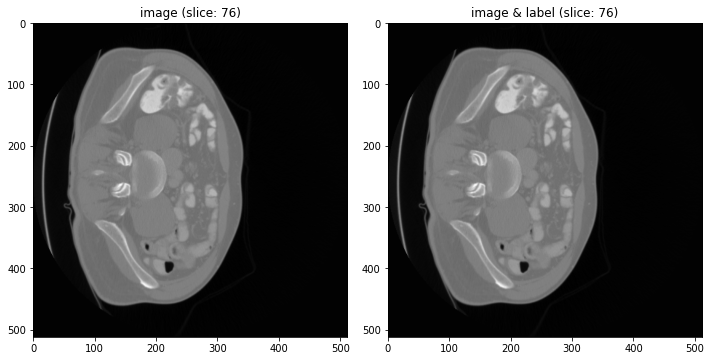


pid: img0031
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0031.nii.gz
img shape: [512, 512, 93]
img spacing: [0.8378906, 0.8378906, 3.0]
lbl shape: [512, 512, 93]
lbl spacing: [0.8378906, 0.8378906, 3.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


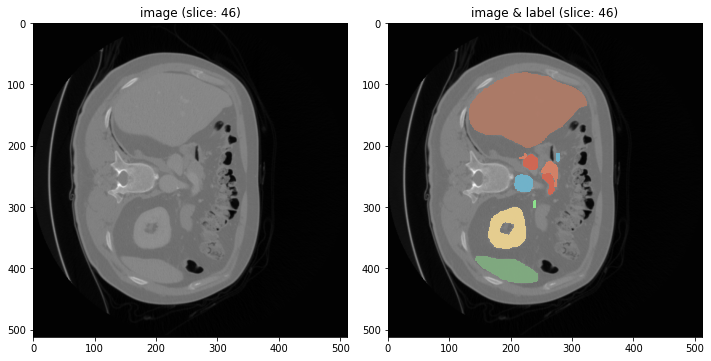


pid: img0032
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0032.nii.gz
img shape: [512, 512, 144]
img spacing: [0.7402344, 0.7402344, 3.0]
lbl shape: [512, 512, 144]
lbl spacing: [0.7402344, 0.7402344, 3.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


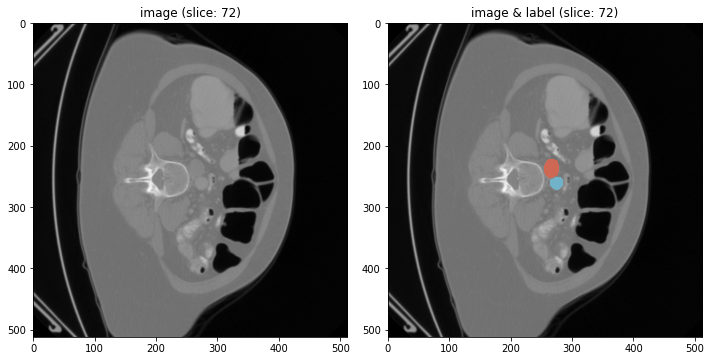


pid: img0033
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0033.nii.gz
img shape: [512, 512, 104]
img spacing: [0.814453, 0.814453, 5.0]
lbl shape: [512, 512, 104]
lbl spacing: [0.814453, 0.814453, 5.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


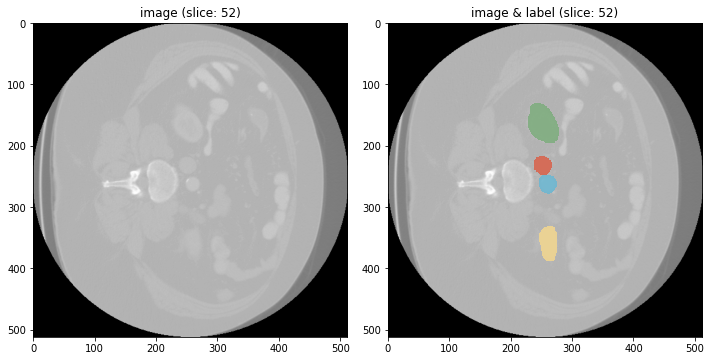


pid: img0034
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0034.nii.gz
img shape: [512, 512, 98]
img spacing: [0.671875, 0.671875, 5.0]
lbl shape: [512, 512, 98]
lbl spacing: [0.671875, 0.671875, 5.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


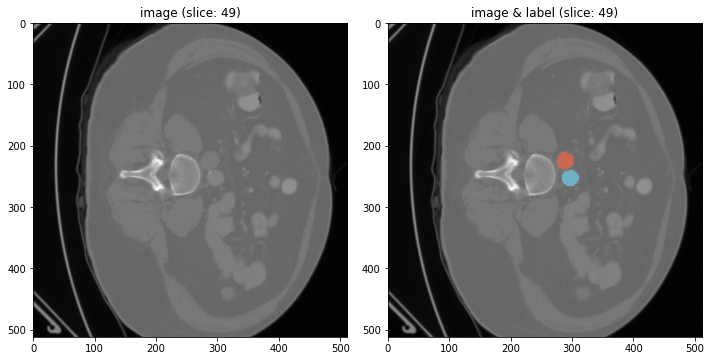


pid: img0035
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0035.nii.gz
img shape: [512, 512, 94]
img spacing: [0.919922, 0.919922, 5.0]
lbl shape: [512, 512, 94]
lbl spacing: [0.919922, 0.919922, 5.0]
lbl ids: [ 0.  1.  2.  3.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


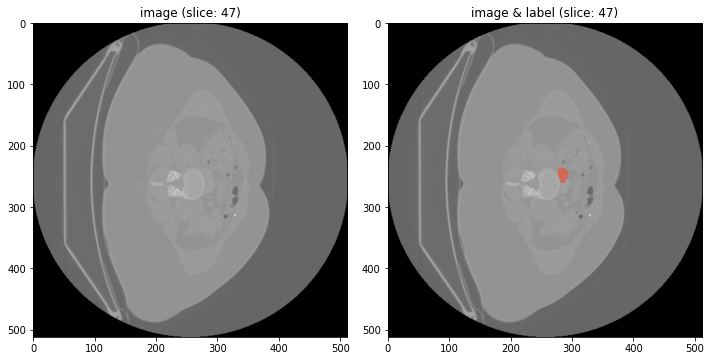


pid: img0036
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0036.nii.gz
img shape: [512, 512, 184]
img spacing: [0.74609375, 0.74609375, 3.0]
lbl shape: [512, 512, 184]
lbl spacing: [0.74609375, 0.74609375, 3.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


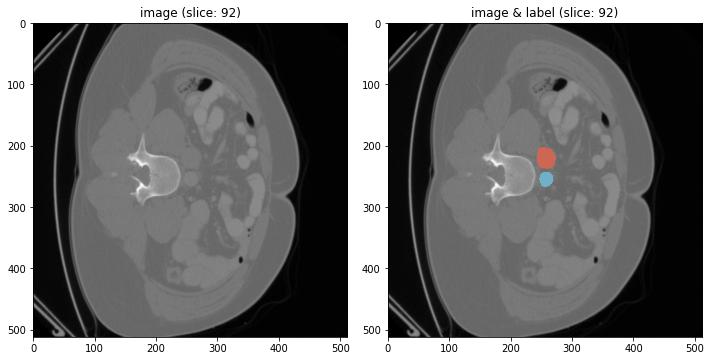


pid: img0037
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0037.nii.gz
img shape: [512, 512, 99]
img spacing: [0.703125, 0.703125, 5.0]
lbl shape: [512, 512, 99]
lbl spacing: [0.703125, 0.703125, 5.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


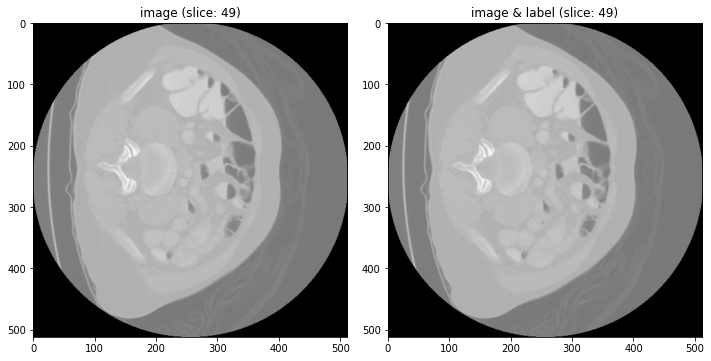


pid: img0038
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0038.nii.gz
img shape: [512, 512, 100]
img spacing: [0.976562, 0.976562, 5.0]
lbl shape: [512, 512, 100]
lbl spacing: [0.976562, 0.976562, 5.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


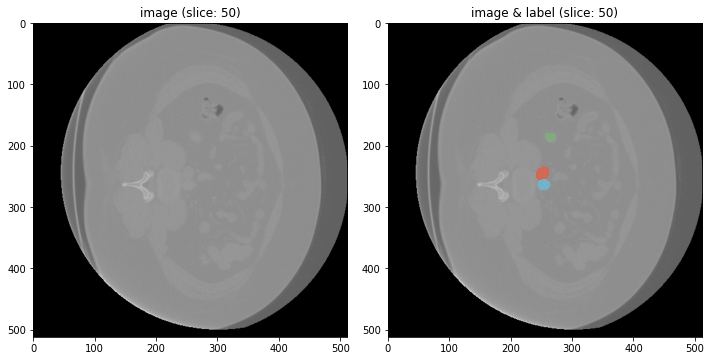


pid: img0039
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0039.nii.gz
img shape: [512, 512, 90]
img spacing: [0.976, 0.976, 5.0]
lbl shape: [512, 512, 90]
lbl spacing: [0.976, 0.976, 5.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


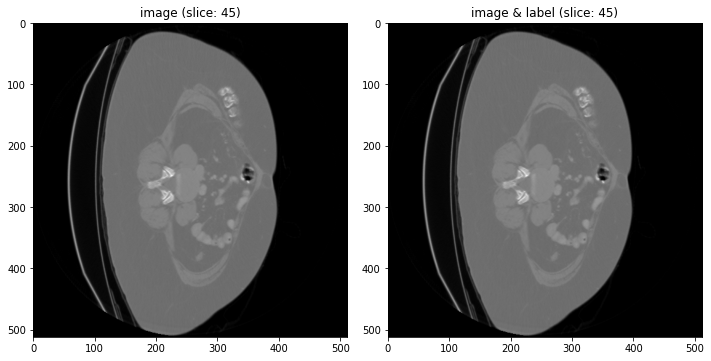


pid: img0040
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/BTCV/Training/img/img0040.nii.gz
img shape: [512, 512, 195]
img spacing: [0.7421875, 0.7421875, 3.0]
lbl shape: [512, 512, 195]
lbl spacing: [0.7421875, 0.7421875, 3.0]
lbl ids: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


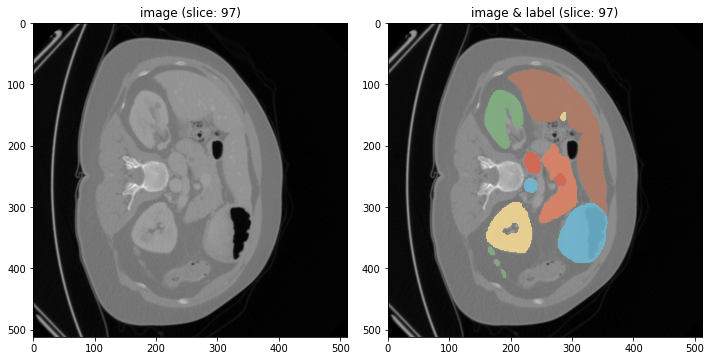

In [ ]:
data_info_df = get_data_info(data_dicts)

In [ ]:
data_info_df

,pid,img_shape,img_space,lbl_shape,lbl_space,lbl_ids
0,img0001,"[512, 512, 147]","[0.66796875, 0.66796875, 3.0]","[512, 512, 147]","[0.66796875, 0.66796875, 3.0]","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
1,img0002,"[512, 512, 139]","[0.7207031, 0.7207031, 3.0]","[512, 512, 139]","[0.7207031, 0.7207031, 3.0]","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
2,img0003,"[512, 512, 198]","[0.8984375, 0.8984375, 3.0]","[512, 512, 198]","[0.8984375, 0.8984375, 3.0]","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
3,img0004,"[512, 512, 140]","[0.59375, 0.59375, 3.0]","[512, 512, 140]","[0.59375, 0.59375, 3.0]","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
4,img0005,"[512, 512, 117]","[0.90625, 0.90625, 3.0]","[512, 512, 117]","[0.90625, 0.90625, 3.0]","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
5,img0006,"[512, 512, 131]","[0.7011719, 0.7011719, 3.0]","[512, 512, 131]","[0.7011719, 0.7011719, 3.0]","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
6,img0007,"[512, 512, 163]","[0.7480469, 0.7480469, 3.0]","[512, 512, 163]","[0.7480469, 0.7480469, 3.0]","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
7,img0008,"[512, 512, 148]","[0.7285156, 0.7285156, 3.0]","[512, 512, 148]","[0.7285156, 0.7285156, 3.0]","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
8,img0009,"[512, 512, 149]","[0.976562, 0.976562, 2.5]","[512, 512, 149]","[0.976562, 0.976562, 2.5]","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
9,img0010,"[512, 512, 148]","[0.78125, 0.78125, 3.0]","[512, 512, 148]","[0.78125, 0.78125, 3.0]","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."


In [ ]:
shape_df = pd.DataFrame(data_info_df['img_shape'].to_list(), columns=['w', 'h', 's'])
shape_df.mean()

w    512.000000
h    512.000000
s    125.966667
dtype: float64

In [ ]:
space_df = pd.DataFrame(data_info_df['img_space'].to_list(), columns=['x', 'y', 'z'])
space_df.mean()

x    0.783184
y    0.783184
z    3.783333
dtype: float32

## Statcics

In [ ]:
base_tf = Compose([
    LoadImaged(keys=['image', 'label']),
    AddChanneld(keys=['image', 'label'])
])

ds = CacheDataset(
    data=data_dicts,
    transform=base_tf
)

Loading dataset: 100%|██████████| 30/30 [01:25<00:00,  2.86s/it]


In [ ]:
# ref: https://arxiv.org/pdf/1904.08128.pdf
s = DatasetSummary(ds)
s.calculate_percentiles()
s.calculate_statistics()
data_target_space = s.get_target_spacing()

In [ ]:
print('data target space:')
data_target_space

data target space:


(0.7578124403953552, 0.7578124403953552, 3.0)

In [ ]:
print('data intensities statcics:')
data_intensities_statcics = pd.DataFrame(
    [[s.data_min, s.data_median, s.data_max, s.data_mean, s.data_std, s.data_min_percentile, s.data_max_percentile]],
    columns=['min', 'med', 'max', 'mean', 'std', 'min_percentile (0.5%)', 'max_percentile (99.5%)']
)
data_intensities_statcics

data intensities statcics:


,min,med,max,mean,std,min_percentile (0.5%),max_percentile (99.5%)
0,-1024.0,96.0,3071.0,82.921959,136.967651,-958.0,326.0


## Transform

In [5]:
tf = Compose([
    LoadImaged(keys=['image', 'label']),
    AddChanneld(keys=['image', 'label']),
    Orientationd(keys=["image", "label"], axcodes="RAS"),
    Spacingd(
        keys=["image", "label"],
        pixdim=(1.5, 1.5, 2.0),
        mode=("bilinear", "nearest"),
    ),
    ScaleIntensityRanged(
        keys=["image"],
        a_min=-175,
        a_max=250,
        b_min=0.0,
        b_max=1.0,
        clip=True,
    ),
    NormalizeIntensityd(
        keys=["image"],
        subtrahend=83,
        divisor=137
    )
])

ds = CacheDataset(
    data=[data_dicts[0]],
    transform=tf
)

/usr/local/lib/python3.8/dist-packages/monai/utils/deprecate_utils.py:107: FutureWarning: <class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
  warn_deprecated(obj, msg, warning_category)
Loading dataset: 100%|██████████| 1/1 [00:15<00:00, 15.50s/it]


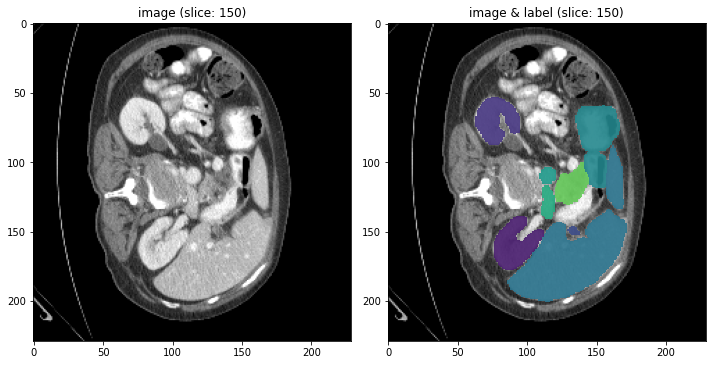

In [13]:
data = first(ds)
data['image'].shape
slice_idx = 150
show_img_lbl(
    data['image'][0,:,:,slice_idx],
    data['label'][0,:,:,slice_idx],
    slice_idx=slice_idx,
    num_classes=14,
    axis_off=False,
    fig_size=(10,5)
)

In [ ]:
tf = Compose([
    LoadImaged(keys=['image', 'label']),
    AddChanneld(keys=['image', 'label']),
    Orientationd(keys=["image", "label"], axcodes="RAS"),
    Spacingd(
        keys=["image", "label"],
        pixdim=(1.5, 1.5, 2.0),
        mode=("bilinear", "nearest"),
    ),
    ScaleIntensityRanged(
        keys=["image"],
        a_min=-175,
        a_max=250,
        b_min=0.0,
        b_max=1.0,
        clip=True,
    ),
])

ds = CacheDataset(
    data=[data_dicts[0]],
    transform=tf
)

/usr/local/lib/python3.7/dist-packages/monai/utils/deprecate_utils.py:110: FutureWarning: <class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
  warn_deprecated(obj, msg, warning_category)
Loading dataset: 100%|██████████| 1/1 [00:03<00:00,  3.59s/it]


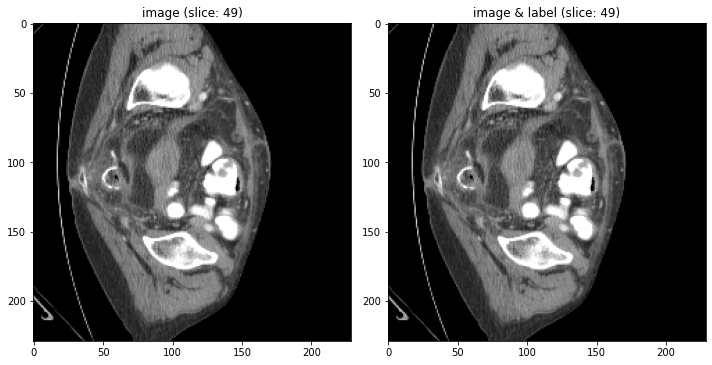

In [ ]:
data = first(ds)
data['image'].shape
slice_idx = 49
show_img_lbl(
    data['image'][0,:,:,slice_idx],
    data['label'][0,:,:,slice_idx],
    slice_idx=slice_idx,
    num_classes=2,
    axis_off=False,
    fig_size=(10,5)
)